In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import re

def parse_runtime( filename ):
    out_dict = {}
    n_regex = re.compile( "N=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                print( "N: ", n)
                out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict

def parse_core_count( filename ):
    out_dict = {}
    n_regex = re.compile( "C=(\d+)" )
    t_regex = re.compile( "Time CPU Only: (\d+\.\d+)" )

    with open( filename, 'r' ) as open_file:
        for line in open_file:
            n_found = n_regex.search( line )
            t_found = t_regex.search( line )
            if n_found:
                n = int( n_found.group( 1 ) )
                print( "N: ", n)
                out_dict[ n ] = list()
            elif t_found:
                time = float( t_found.group( 1 ) )
                out_dict[ n ].append( time )
    return out_dict


N:  1000000000
N:  2000000000
N:  3000000000
N:  4000000000
N:  5000000000
{1000000000: [1.648479, 1.67644, 1.648134, 1.858499, 1.614204, 1.675532], 2000000000: [3.302317, 3.186133, 3.247264, 3.125404, 3.32394, 3.244102], 3000000000: [4.917774, 4.664787, 4.840819, 4.867389, 4.813148, 4.761134], 4000000000: [6.339725, 6.548195, 6.544226, 6.166334, 7.006205, 6.774142], 5000000000: [8.416452, 8.307911, 9.434832, 8.318536, 8.7026, 8.416097]}


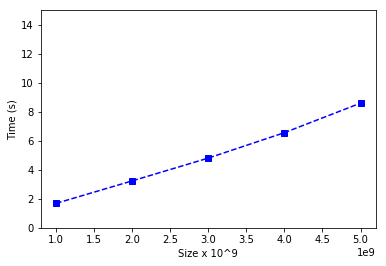

In [25]:
times = parse_runtime( 'outfile_2.tsv' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
ax.set_ylim( 0, 15 )
plt.suptitle( "")
plt.xlabel( "Size x 10^9")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 

N:  1
N:  2
N:  4
N:  8
N:  16
{1: [18.303793, 18.331407, 18.331028, 18.298071, 18.29694, 18.310826], 2: [9.50209, 9.423733, 9.466938, 9.356036, 9.393869, 9.318862], 4: [5.036041, 5.444924, 5.150116, 5.784407, 5.395327, 5.565976], 8: [2.838335, 2.823942, 2.72738, 2.813958, 2.941283, 2.775347], 16: [1.81365, 1.729895, 1.928719, 1.588934, 1.702559, 1.923143]}


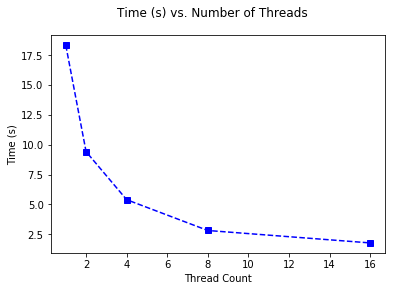

In [9]:
times = parse_core_count( 'outfile_scale.txt' )
ax = plt.subplot()

x = list( times.keys() )
y = [ np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Time (s) vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Time (s)")
ax.plot( x, y, "bs--" )
print( times) 


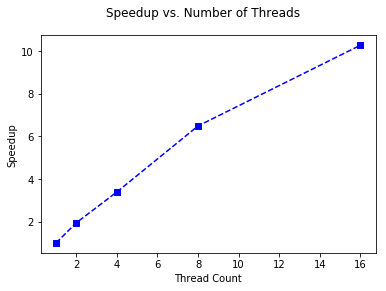

In [10]:
ax = plt.subplot()
t_0 = np.mean( times[ 1 ] )
x = list( times.keys() )
y = [ t_0 / np.mean( times[ value ] ) for value in x ]
#ax.set_ylim( 0, 15 )
plt.suptitle( "Speedup vs. Number of Threads")
plt.xlabel( "Thread Count")
plt.ylabel( "Speedup")
ax.plot( x, y, "bs--" )